In [ ]:
pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 8.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from collections import Counter
"""
importo librerie
"""
sns.set(style="darkgrid")
"""
faccio download di librerie
"""
nltk.download("stopwords")
stop_words = stopwords.words("english")
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
"""
carico il dataset e analizzo composizione
"""
dataset_true = pd.read_csv("/content/True.csv")
dataset_fake = pd.read_csv("/content/Fake.csv")

"""
assegno al dataset true e fake un label
"""
dataset_true["label"] = 0
dataset_fake["label"] = 1
df = pd.concat([dataset_true, dataset_fake], axis=0).reset_index(drop=True)


print(df.head(10))


print(f"composizione dataset concatenati: {df.shape}")
print(f" true dataset: {dataset_true.shape}")
print(f"fake dataset: {dataset_fake.shape}")
print("\nEsempi di titoli originali:")
print(df["title"].sample(5))
df.sample(5)

"""
controllo se sono presenti valori nulli nella colonna title
"""
df["title"].isnull().sum()

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   
5  White House, Congress prepare for talks on spe...   
6  Trump says Russia probe will be fair, but time...   
7  Factbox: Trump on Twitter (Dec 29) - Approval ...   
8         Trump on Twitter (Dec 28) - Global Warming   
9  Alabama official to certify Senator-elect Jone...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) -

0

In [ ]:
"""
definisco funzione per pulizia del testo la applico alla series title, stampo poi i titoli puliti
"""
def clean_text(text):
    return " ".join([word for word in simple_preprocess(str(text), deacc=True) if word not in stop_words and len(word) >= 5])


"""
creo nuova feature con titoli puliti
"""
df["clean_title"] = df["title"].apply(clean_text)
print("\nEsempi di titoli puliti:")
print(df["clean_title"].head(5))


"""
effettuo anche lemmatizzazione
"""
nlp= spacy.load("en_core_web_sm")
df["clean_title"] = df["clean_title"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x)]))
print("\nEsempi di titoli lemmatizzati:")
print(df["clean_title"].head(5))

"""
eseguo pulizia e lemmatizzazione anche per la feature text
"""
df["clean_text"] = df["text"].apply(clean_text)
print("\nEsempi di testo pulito:")
print(df["clean_text"].head(5))
nlp = spacy.load("en_core_web_sm")
df["clean_text"] = df["clean_text"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x)]))
print("\nEsempi di testo lemmatizzato:")
print(df["clean_text"].head(5))

"""
creo una colonna che combina le due feature che utilizzero' solo per addestrare i modelli
"""
df["combined_text"] = df["clean_title"] + " " + df["clean_text"]



Esempi di titoli puliti:
0         budget fight looms republicans fiscal script
1    military accept transgender recruits monday pe...
2                    senior republican senator mueller
3              russia probe helped australian diplomat
4    trump wants postal service charge amazon shipm...
Name: clean_title, dtype: object

Esempi di titoli lemmatizzati:
0          budget fight loom republicans fiscal script
1    military accept transgender recruit monday pen...
2                    senior republican senator mueller
3                russia probe help australian diplomat
4     trump want postal service charge amazon shipment
Name: clean_title, dtype: object

Esempi di testo pulito:
0    washington reuters conservative republican fac...
1    washington reuters transgender people allow fi...
2    washington reuters special counsel investigati...
3    washington reuters trump campaign adviser geor...
4    seattle washington reuters president donald tr...
Name: clean_text, dtype: o

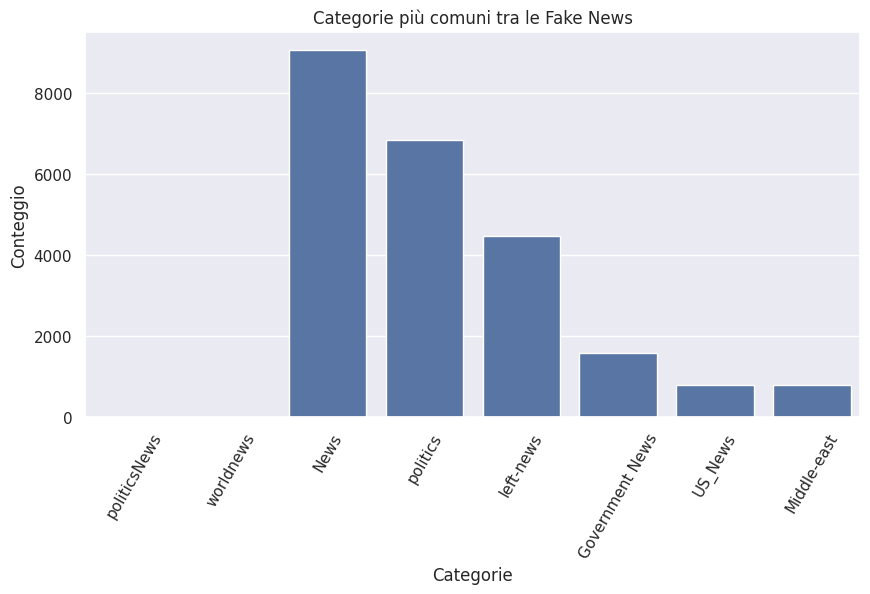

label
1    23481
0    21417
Name: count, dtype: int64


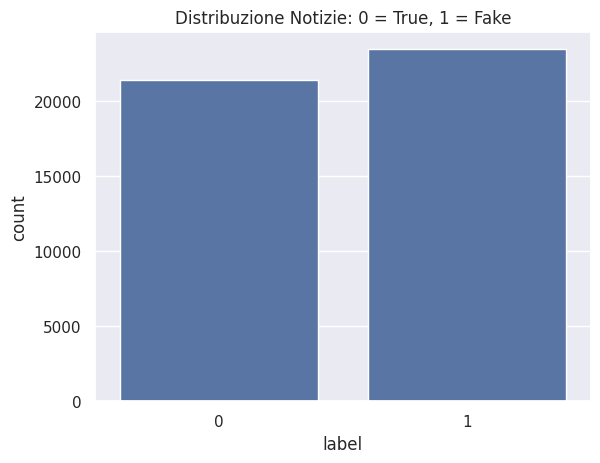

[(0,
  '0.154*"video" + 0.021*"trump" + 0.021*"black" + 0.021*"obama" + '
  '0.011*"police" + 0.011*"terrorist" + 0.011*"medium" + 0.009*"people" + '
  '0.008*"break" + 0.008*"expose"'),
 (1,
  '0.030*"trump" + 0.026*"america" + 0.017*"obama" + 0.017*"muslim" + '
  '0.013*"president" + 0.011*"refugee" + 0.011*"break" + 0.009*"world" + '
  '0.009*"college" + 0.006*"medium"'),
 (2,
  '0.050*"trump" + 0.019*"watch" + 0.017*"white" + 0.016*"obama" + '
  '0.012*"liberal" + 0.011*"illegal" + 0.010*"house" + 0.010*"clinton" + '
  '0.009*"woman" + 0.009*"make"'),
 (3,
  '0.023*"hillary" + 0.018*"supporter" + 0.014*"student" + 0.013*"trump" + '
  '0.013*"racist" + 0.011*"syria" + 0.009*"state" + 0.009*"terror" + '
  '0.009*"clinton" + 0.008*"story"'),
 (4,
  '0.054*"hillary" + 0.048*"trump" + 0.016*"donald" + 0.016*"clinton" + '
  '0.015*"american" + 0.013*"watch" + 0.009*"protester" + 0.009*"catch" + '
  '0.008*"president" + 0.007*"obama"')]


In [ ]:
"""
grafico fake news piu' frequenti in una determinata categoria
"""
plt.figure(figsize=(10,5))
sns.countplot(data=df[df["label"] == 1], x="subject", order=df["subject"].value_counts().index)
plt.xlabel("Categorie")
plt.ylabel("Conteggio")
plt.title("Categorie più comuni tra le Fake News")
plt.xticks(rotation=60)
plt.show()

"""
count delle fake news e true news
"""
print(df["label"].value_counts())

sns.countplot(data=df, x="label")
plt.title("Distribuzione Notizie: 0 = True, 1 = Fake")
plt.show()

"""
alternativa per stabilire categorie piu' frequenti, trovare dei topics con lda
"""
import gensim
from gensim import corpora
from pprint import pprint

corpus = df["clean_title"].tolist()
dictionary = corpora.Dictionary([doc.split() for doc in corpus])
corpus_bow = [dictionary.doc2bow(doc.split()) for doc in corpus]
lda_model = gensim.models.LdaModel(corpus=corpus_bow, id2word=dictionary, num_topics=5)
pprint(lda_model.print_topics())



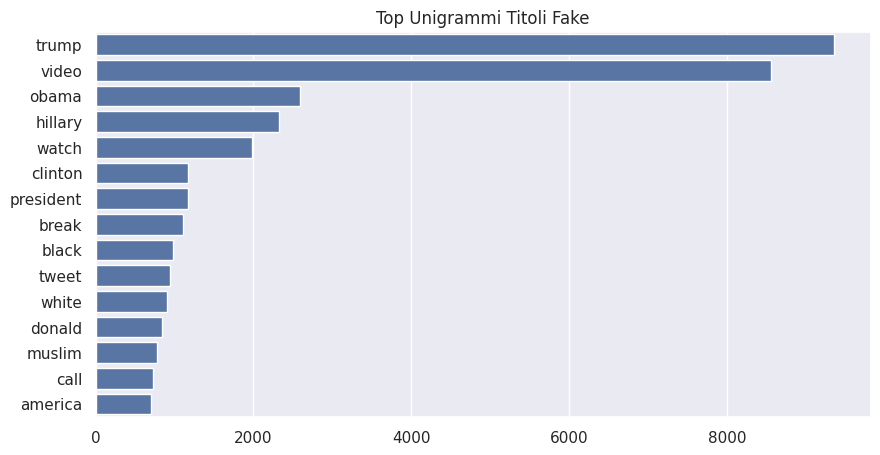

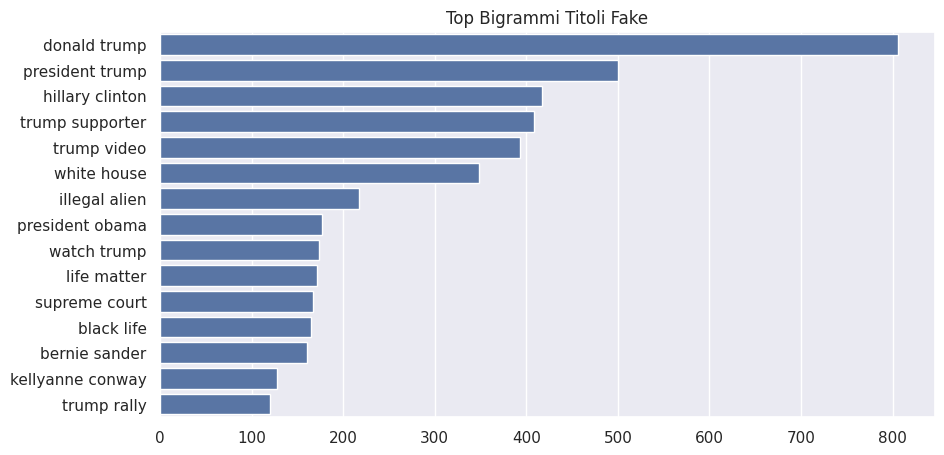

In [ ]:
"""
Analisi di pattern ricorrenti nei titoli con N-Gram per fake
"""
def plot_top_ngrams(corpus, ngram_range=(1, 1), n=15, title="Top N-grams"):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bow = vec.transform(corpus)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]
    x, y = zip(*words_freq)

    #inserisco grafico per vedere n grammi fake
    plt.figure(figsize=(10, 5))
    sns.barplot(x=y, y=x)
    plt.title(title)
    plt.show()
"""
creo variabile fake titles prendendo i titoli precedentemente puliti con label = 1 e applico la funzione per vedere i top bigrammi e unigrammi
"""

fake_titles = df[df["label"] == 1]["clean_title"]
plot_top_ngrams(fake_titles, (1,1), 15, "Top Unigrammi Titoli Fake")
plot_top_ngrams(fake_titles, (2,2), 15, "Top Bigrammi Titoli Fake")

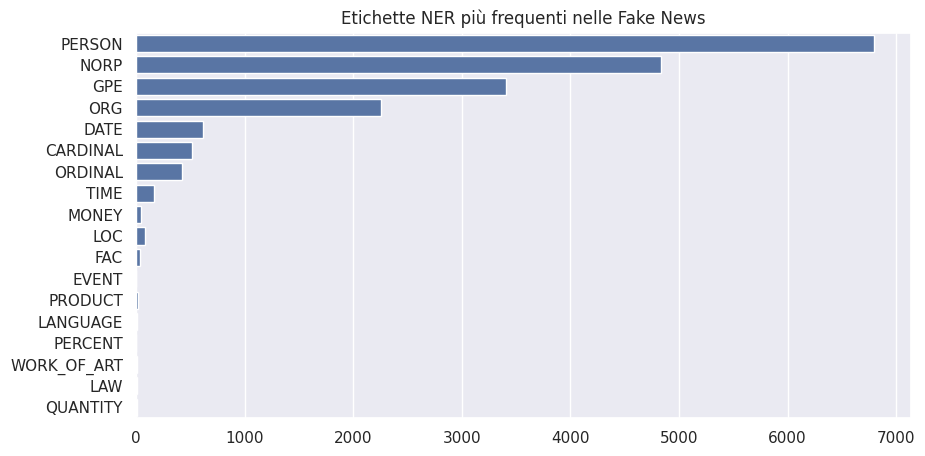

In [ ]:
"""
applico NER con spacy per trovare le categorie piu' frequenti tra le fake news
"""

nlp = spacy.load("en_core_web_sm")
nlp.max_length = 10000000
text_fake = " ".join(fake_titles.tolist())
doc = nlp(text_fake)
entity_labels = [ent.label_ for ent in doc.ents]
label_counts = Counter(entity_labels)

"""
creo grafico per vedere le categorie NER più frequenti tra le fake news
asse y etichette e asse x il counter delle label
"""


plt.figure(figsize=(10,5))
sns.barplot(x=list(label_counts.values()), y=list(label_counts.keys()))
plt.title("Etichette NER più frequenti nelle Fake News")
plt.show()

In [ ]:
"""
vettorizzazione con TF-IDF del testo pulito
"""
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["clean_title"])
y = df["label"].values

"""
split del dataset in train e test e utilizzo di stratify per mantenere la distribuzione del target
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# LOGISTIC REGRESSION
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_train_lr = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression: \n")
print("Train Accuracy:", accuracy_score(y_train, y_train_lr))
print("Train Precision:", precision_score(y_train, y_train_lr))
print("Train Recall:", recall_score(y_train, y_train_lr))
print("Train F1:", f1_score(y_train, y_train_lr))
print("Test Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Test Precision:", precision_score(y_test, y_pred_lr))
print("Test Recall:", recall_score(y_test, y_pred_lr))
print("Test F1:", f1_score(y_test, y_pred_lr))

# MLP classifier
mlp = MLPClassifier(activation="logistic", hidden_layer_sizes=(100,), max_iter=200, solver='adam', tol=0.005, verbose=False)
mlp.fit(X_train, y_train)
y_train_mlp = mlp.predict(X_train)
y_pred_mlp = mlp.predict(X_test)



print("MLP Classifier: \n")
print("Train Accuracy:", accuracy_score(y_train, y_train_mlp))
print("Train Precision:", precision_score(y_train, y_train_mlp))
print("Train Recall:", recall_score(y_train, y_train_mlp))
print("Train F1:", f1_score(y_train, y_train_mlp))
print("Test Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Test Precision:", precision_score(y_test, y_pred_mlp))
print("Test Recall:", recall_score(y_test, y_pred_mlp))
print("Test F1:", f1_score(y_test, y_pred_mlp))


print("classification report \n")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_mlp))



Logistic Regression: 

Train Accuracy: 0.9479648087309984
Train Precision: 0.9583288176005202
Train Recall: 0.9414426404045781
Train F1: 0.9498106823491501
Test Accuracy: 0.9237193763919822
Test Precision: 0.9398991006799737
Test Recall: 0.9124787052810903
Test F1: 0.9259859535386278
MLP Classifier: 

Train Accuracy: 0.9834066484770867
Train Precision: 0.9858951755088956
Train Recall: 0.9823263241948363
Train F1: 0.9841075142659058
Test Accuracy: 0.9283964365256124
Test Precision: 0.9344051446945337
Test Recall: 0.928236797274276
Test F1: 0.931310757397714
classification report 

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      4284
           1       0.93      0.93      0.93      4696

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



In [ ]:
"""
provo a fare la stessa cosa con il dataset con testo e titolo uniti per vedere se migliorano  i risultati, si nota però overfitting sul secondo modello che probabilmente è troppo complesso

"""
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["combined_text"])
y = df["label"].values

"""
split del dataset in train e test e utilizzo di stratify per mantenere la distribuzione del target
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# LOGISTIC REGRESSION
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_train_lr = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression: \n")
print("Train Accuracy:", accuracy_score(y_train, y_train_lr))
print("Train Precision:", precision_score(y_train, y_train_lr))
print("Train Recall:", recall_score(y_train, y_train_lr))
print("Train F1:", f1_score(y_train, y_train_lr))
print("Test Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Test Precision:", precision_score(y_test, y_pred_lr))
print("Test Recall:", recall_score(y_test, y_pred_lr))
print("Test F1:", f1_score(y_test, y_pred_lr))

# MLP classifier
mlp = MLPClassifier(activation="logistic", hidden_layer_sizes=(100,), max_iter=200, solver='adam', tol=0.005, verbose=False)
mlp.fit(X_train, y_train)
y_train_mlp = mlp.predict(X_train)
y_pred_mlp = mlp.predict(X_test)




print("MLP Classifier: \n")
print("Train Accuracy:", accuracy_score(y_train, y_train_mlp))
print("Train Precision:", precision_score(y_train, y_train_mlp))
print("Train Recall:", recall_score(y_train, y_train_mlp))
print("Train F1:", f1_score(y_train, y_train_mlp))
print("Test Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Test Precision:", precision_score(y_test, y_pred_mlp))
print("Test Recall:", recall_score(y_test, y_pred_mlp))
print("Test F1:", f1_score(y_test, y_pred_mlp))


print("classification report \n")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_mlp))


Logistic Regression: 

Train Accuracy: 0.9877777159084582
Train Precision: 0.9901677888212034
Train Recall: 0.9864253393665159
Train F1: 0.9882930211472306
Test Accuracy: 0.9809576837416482
Test Precision: 0.9833368938261056
Test Recall: 0.9801959114139693
Test F1: 0.9817638903700544
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4284
           1       0.98      0.99      0.99      4696

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

MLP Classifier: 

Train Accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0
Train F1: 1.0
Test Accuracy: 0.9860801781737194
Test Precision: 0.9849352853808614
Test Recall: 0.9885008517887564
Test F1: 0.9867148474864491
classification report 

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4284
           1       0.98      0.99  